<a href="https://colab.research.google.com/github/kumuds4/BCH/blob/master/BI_LSTMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [14]:
dataset = tfds.load('imdb_reviews', as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

batch_size = 32

train_dataset = train_dataset.shuffle(10000).batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

In [6]:
example, label = next(iter(train_dataset))
print('Text:\n', example.numpy()[0])
print('\nLabel: ', label.numpy()[0])

Text:
 b'That\'s a snippet of choice dialogue delivered by the evil, ballbusting lady assistant of a famous scientist to her prim maid just before she lures three incredibly dumb college girls to a mansion for behavior modification experiments. Meanwhile, at the local bar, people drink and dance to lame 80s rock songs. A biker punk has sex with a cycle slut on a pinball table in front of a crowd of people, then tries to rape the scientist\'s virginal daughter Jessica (Debra Hunter), who is in love with another biker (Dale Midkiff, from PET SEMATARY), who, in turn, is in cohorts with the assistant! Back at the house, the sorority bimbos swim, shower, change clothes and have sex with men from the bar. A small silver ball (part of the experiment) flies into victims mouths and turns them into drooling, killer zombies!<br /><br />If that isn\'t enough to entertain you, there\'s a hilarious theme song ("Nightmare Fantasy"), roller skating, some serious daisy dukes and a psychic hand puppet (

In [15]:
vectorize_layer = tf.keras.layers.TextVectorization(output_mode='int', output_sequence_length=100)

vectorize_layer.adapt(train_dataset.map(lambda x, y: x))

In [16]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(len(vectorize_layer.get_vocabulary()), 32, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1)
])

model.build(input_shape=(None,))

model.summary()

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_1            │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 100, 32)        │     3,900,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 100, 64)        │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 32)             │        10,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,927,649 (14.98 MB)

 Trainable params: 3,927,649 (14.98 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.9853 - loss: 0.0444 - val_accuracy: 0.7845 - val_loss: 0.7947
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - accuracy: 0.9933 - loss: 0.0226 - val_accuracy: 0.7749 - val_loss: 0.9366
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - accuracy: 0.9949 - loss: 0.0170 - val_accuracy: 0.7700 - val_loss: 1.1490
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.9958 - loss: 0.0121 - val_accuracy: 0.7797 - val_loss: 1.0802
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.9971 - loss: 0.0099 - val_accuracy: 0.7769 - val_loss: 1.3210


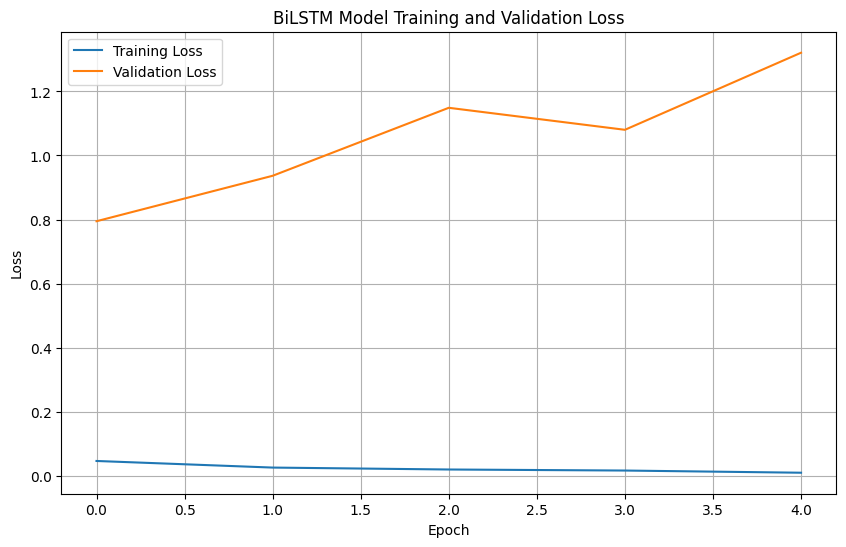

In [18]:
history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=test_dataset,
)

# Plotting Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('BiLSTM Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.5033 - loss: 0.6956 - val_accuracy: 0.5200 - val_loss: 0.6913
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4558 - loss: 0.6955 - val_accuracy: 0.5800 - val_loss: 0.6916
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5176 - loss: 0.6946 - val_accuracy: 0.4733 - val_loss: 0.6933
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4951 - loss: 0.6936 - val_accuracy: 0.5467 - val_loss: 0.6913
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5137 - loss: 0.6927 - val_accuracy: 0.4800 - val_loss: 0.6960
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5028 - loss: 0.6966 - val_accuracy: 0.5267 - val_loss: 0.6917
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5171 - loss: 0.6904 - val_accuracy: 0.5200 - val_loss: 0.6915
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5278 - loss: 0.6942 - val_accuracy: 0.5067 - v

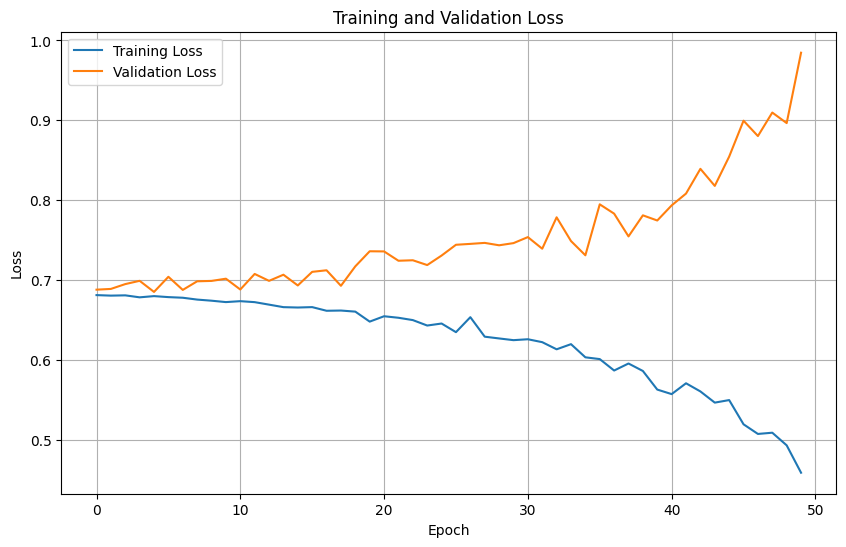

Test Loss: 0.7730
Test Accuracy: 0.5867


In [23]:
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X and y are your features and target
# For demonstration, create dummy data
X = np.random.rand(1000, 10, 5) # 100 samples, 10 timesteps, 5 features
y = np.random.randint(0, 2, 1000) # Binary classification target

# Split into training + validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Split the training + validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=(0.15/0.85), random_state=42)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout

model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Bidirectional(LSTM(32)),
    Dropout(0.2),
    Dense(1, activation='sigmoid') # For binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_val, y_val), verbose=1)
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_val, y_val), verbose=1)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.8460 - loss: 0.6534 - val_accuracy: 1.0000 - val_loss: 0.4770
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.3770 - val_accuracy: 1.0000 - val_loss: 0.1309
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0806 - val_accuracy: 1.0000 - val_loss: 0.0173
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0106 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 9.8362e-04
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 9.8624e-04 - val_accuracy: 1.0

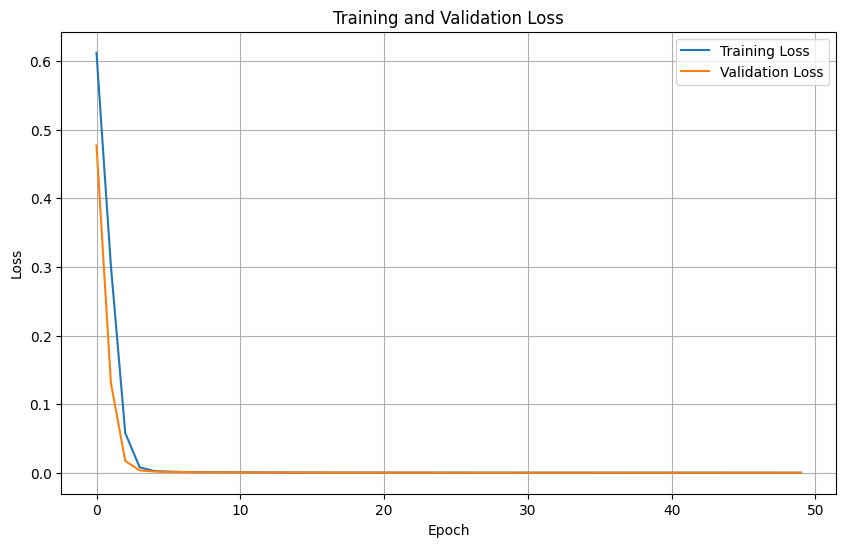

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 3.4489e-05 
Test Loss: 0.0000
Test Accuracy: 1.0000


In [26]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
# Example data (replace with your actual dataset)
texts = ["This is a positive review.", "Negative sentiment here.", "Neutral opinion.", "Another positive statement.", "Bad experience."] * 100
labels = [1, 0, 0, 1, 0] * 100

# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(texts, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert data to TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)


max_tokens = 10000  # Maximum vocabulary size
output_sequence_length = 100 # Max length of vectorized sequences

vectorize_layer = TextVectorization(
    max_tokens=max_tokens,
    output_mode='int',
    output_sequence_length=output_sequence_length
)

vectorize_layer.adapt(train_dataset.map(lambda x, y: x))
embedding_dim = 128
lstm_units = 64

model = Sequential([
    vectorize_layer,
    Embedding(max_tokens, embedding_dim, mask_zero=True), # mask_zero for variable sequence lengths
    Bidirectional(LSTM(lstm_units)),
    Dense(1, activation='sigmoid') # For binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
epochs = 50
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")